In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
if not os.path.exists("small_libs"):
    print("the directory small_libs is created")
    !git clone https://github.com/vincentvigon/small_libs
else:
    print("the directory small_libs is updated")
    %cd small_libs
    !git pull https://github.com/vincentvigon/small_libs
    %cd ..

the directory small_libs is created
Cloning into 'small_libs'...
remote: Enumerating objects: 317, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 317 (delta 31), reused 78 (delta 20), pack-reused 221
Receiving objects: 100% (317/317), 38.00 MiB | 19.07 MiB/s, done.
Resolving deltas: 100% (148/148), done.


In [3]:
%pwd

'/content'

In [4]:
%ls

sample_data/  small_libs/


In [5]:
import small_libs as sl
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

importation de small_libs, ajout de small_libs dans votre PYTHONPATH
small_libs importation


# Derivator

## Simple dérivation suivant 2 axes

In [6]:
x=tf.linspace(0.,1,100)
a0=x[:,None]
a1=x[None,:]

In [7]:
derivator=sl.Derivator_fft(axes=[0,1],interval_lenghts=[1,1],formula=lambda a0,a1:[a0,a1])

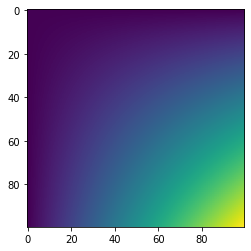

In [8]:
F=a0*a1
plt.imshow(F);

In [9]:
F_a0,F_a1=derivator(F)

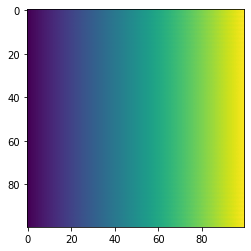

In [10]:
plt.imshow(F_a0);

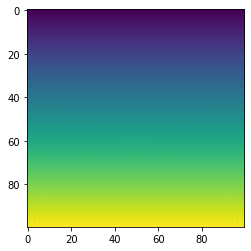

In [11]:
plt.imshow(F_a1);

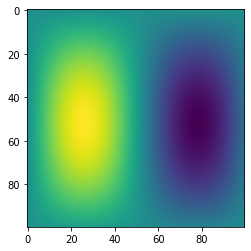

In [12]:
F=tf.sin(3*a0)*tf.sin(6*a1)
plt.imshow(F);

In [13]:
F_a0,F_a1=derivator(F)

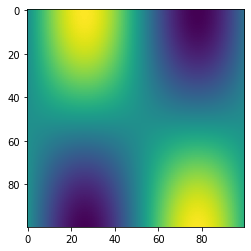

In [14]:
plt.imshow(F_a0);

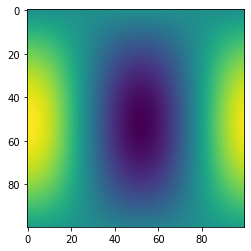

In [15]:
plt.imshow(F_a1);

## Calcul d'une divergence en dim 4

In [16]:
def test_divergence(N,graph_acceleration):
    a0=tf.linspace(0,1,N)
    a1=tf.linspace(0,1,N)
    a2=tf.linspace(0,1,N)
    a3=tf.linspace(0,1,N)

    a0_=a0[:,None,None,None]
    a1_=a1[None,:,None,None]
    a2_=a2[None,None,:,None]
    a3_=a3[None,None,None,:]

    func=lambda a0,a1,a2,a3:a0**2+a1**2+a2**2+a3**2
    div_func=lambda a0,a1,a2,a3: 2*a0+2*a1+2*a2+2*a3

    F=func(a0_,a1_,a2_,a3_)
    div_F=div_func(a0_,a1_,a2_,a3_)

    ti0=time.time()
    derivator_fft=sl.Derivator_fft([0,1,2,3],[1,1,1,1],lambda a0,a1,a2,a3:a0+a1+a2+a3,graph_acceleration=graph_acceleration)
    print("création de l'objet, durée:",time.time()-ti0)

    ti0=time.time()
    div_F_pred=derivator_fft(F)
    print("premier appel de la dérivation:",time.time()-ti0)
    ti0=time.time()
    div_F_pred=derivator_fft(F)
    print("second appel de la dérivation:",time.time()-ti0)

    error=tf.reduce_mean(tf.abs(div_F-div_F_pred))
    print("error",error)

In [17]:
%%time
test_divergence(80,True)

création de l'objet, durée: 1.71661376953125e-05
traçage de la méthode de dérivation du Derivator_fft, temps de traçage: 2.070065498352051
premier appel de la dérivation: 3.3445143699645996
traçage de la méthode de dérivation du Derivator_fft, temps de traçage: 0.9450573921203613
second appel de la dérivation: 1.0792179107666016
error tf.Tensor(0.08505633984118822, shape=(), dtype=float64)
CPU times: user 4.14 s, sys: 207 ms, total: 4.34 s
Wall time: 5.81 s


In [18]:
%%time
test_divergence(80,False)

création de l'objet, durée: 9.298324584960938e-06
premier appel de la dérivation: 0.36830830574035645
second appel de la dérivation: 0.24556303024291992
error tf.Tensor(0.08505633984118734, shape=(), dtype=float64)
CPU times: user 492 ms, sys: 98 ms, total: 590 ms
Wall time: 817 ms


In [20]:
np.log(80**4*36)/np.log(10)

9.168662448735061

Le tenseur fait 1 giga